<a href="https://colab.research.google.com/github/toot09/Python-Data_Analysis-and-Image-Processing-Tutorial/blob/master/10.%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10. OpenCV 임계점 처리하기

cv2.threshold(image, thresh, max_value, type): 임계값을 기준으로 흑/백으로 분류하는 함수
*   image: 처리할 Gray Scale 이미지
*   thresh: 임계 값 (전체 픽셀에 적용)
*   max_value: 임계 값을 넘었을 때 적용할 값
*   type: 임계점을 처리하는 방식

1) THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0

2) THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0

3) THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로

4) THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0

5) THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

In [21]:
from google.colab import files
uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


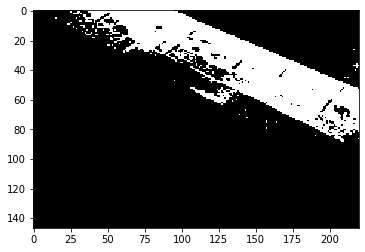

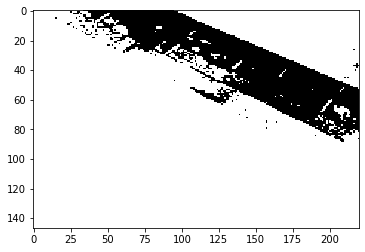

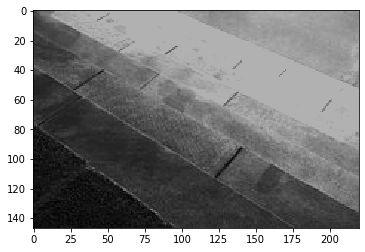

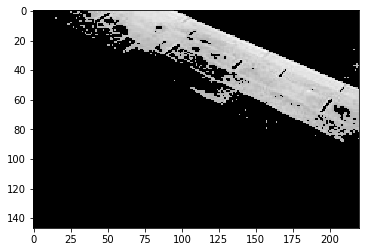

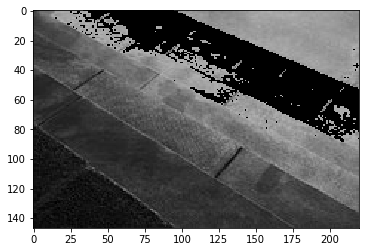

In [83]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("gray_image.jpg",cv2.IMREAD_GRAYSCALE)

imgs = []
#THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
ret, img1 = cv2.threshold(img,177,255,cv2.THRESH_BINARY)
#THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
ret, img2 = cv2.threshold(img,177,255,cv2.THRESH_BINARY_INV)
#THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
ret, img3 = cv2.threshold(img,177,255,cv2.THRESH_TRUNC)
#THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
ret, img4 = cv2.threshold(img,177,255,cv2.THRESH_TOZERO)
#THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로
ret, img5 = cv2.threshold(img,177,255,cv2.THRESH_TOZERO_INV)

imgs.append(img1)
imgs.append(img2)
imgs.append(img3)
imgs.append(img4)
imgs.append(img5)

#0으로 가까울수록 검은색에 가까워짐
for i in imgs:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C): 적응 임계점 처리 함수

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.
*   max_value: 임계 값을 넘었을 때 적용할 값
*   adaptive_method: 임계 값을 결정하는 계산 방법

1) ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정

2) ADAPTIVE_THRESH_GAUSSIAN_C
*   type: 임계점을 처리하는 방식
*   block_size: 임계 값을 적용할 영역의 크기
*   C: 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [63]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image.jpg


<function matplotlib.pyplot.show>

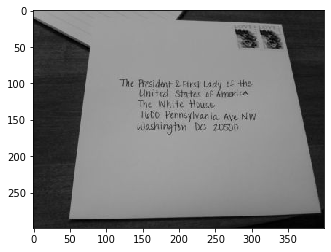

In [82]:
#THRESH_BINARY
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("hand_writing_image.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))
plt.show

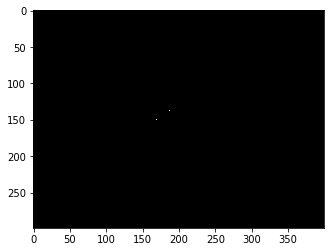

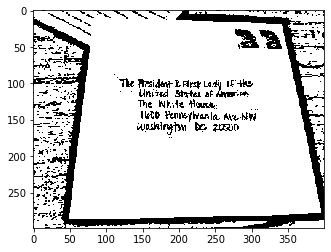

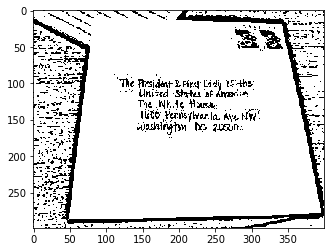

In [81]:
#THRESH_BINARY
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("hand_writing_image.jpg",cv2.IMREAD_GRAYSCALE)
imgs = []
ret, img1 = cv2.threshold(img,177,255,cv2.THRESH_BINARY)
img2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,3)
img3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,3)

imgs.append(img1)
imgs.append(img2)
imgs.append(img3)

for i in range(len(imgs)):
  plt.figure(i)
  plt.imshow(cv2.cvtColor(imgs[i],cv2.COLOR_GRAY2RGB))
  plt.show